In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('peizhi')

### 一份心脏病患者患病情况的数据

In [2]:
heart_df = pd.read_csv('heart.csv')
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* age - 年龄
* sex - (1 = male(男性); 0 = (女性))
* cp - chest pain type(胸部疼痛类型)（1：典型的心绞痛-typical，2：非典型心绞痛-atypical，3：没有心绞痛-non-anginal，4：无症状-asymptomatic）
* trestbps - 静息血压 (in mm Hg on admission to the hospital)
* chol - 胆固醇 in mg/dl
* fbs - (空腹血糖 > 120 mg/dl) (1 = true; 0 = false)
* restecg - 静息心电图测量（0：普通，1：ST-T波异常，2：可能左心室肥大）
* thalach - 最高心跳率
* exang - 运动诱发心绞痛 (1 = yes; 0 = no)
* oldpeak - 运动相对于休息引起的ST抑制
* slope - 运动ST段的峰值斜率（1：上坡-upsloping，2：平的-flat，3：下坡-downsloping）
* ca - 主要血管数目(0-4)
* thal - 一种叫做地中海贫血的血液疾病（3 = normal; 6 = 固定的缺陷-fixed defect; 7 = 可逆的缺陷-reversable defect）
* target - 是否患病 (1=yes, 0=no)

- **特征分析**

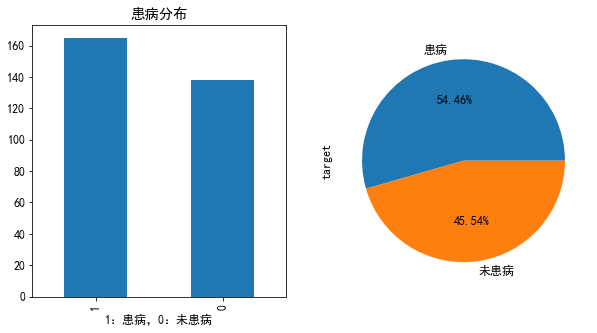

In [3]:
# 患病的分布
fig, axes = plt.subplots(1,2, figsize=(10,5))
ax = heart_df.target.value_counts().plot(kind='bar', ax=axes[0])
ax.set_title("患病分布")
ax.set_xlabel('1：患病，0：未患病')

heart_df.target.value_counts().plot(kind="pie", ax=axes[1], autopct="%.2f%%", labels=['患病', '未患病'])
plt.show()

- 可以看到患者占比接近55%

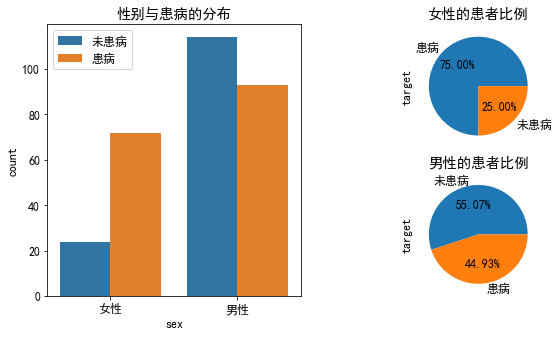

In [4]:
# 性别和患病的分布
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
sns.countplot(x='sex', data=heart_df, hue='target', ax=ax1)
ax1.set_xticklabels(['女性', '男性'])
ax1.legend(labels=['未患病', '患病'], loc=2)
ax1.set_title('性别与患病的分布')

ax2 = plt.subplot(222)
heart_df[heart_df['sex'] == 0]['target'].value_counts().plot(kind='pie', autopct="%.2f%%", labels=['患病', '未患病'], ax=ax2 )
ax2.set_title('女性的患者比例')

ax3 = plt.subplot(224)
heart_df[heart_df['sex'] == 1]['target'].value_counts().plot(kind='pie', autopct="%.2f%%", labels=['未患病', '患病'], ax=ax3 )
ax3.set_title('男性的患者比例')

plt.show()

- 从上图可以看到女性中的患者人数占比达到75%， 远高于男性中的患者人数占比45%。
- 但由于数据量较小（而且男性女性人数不一致），不能完全认为女性的患病率一定高于男性，只能说根据现有的数据是可以这么认为的

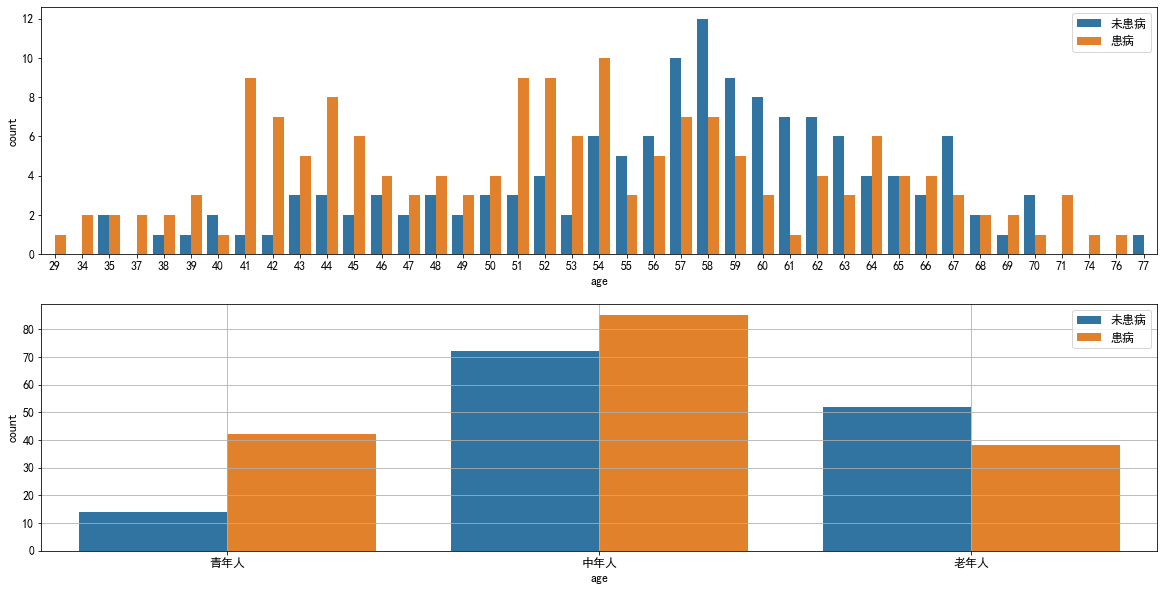

In [5]:
# 年龄和患病的分布
fig, axes = plt.subplots(2,1, figsize=(20,10))
ax = sns.countplot(x='age', hue='target', data=heart_df, ax=axes[0])
ax.legend(labels=['未患病', '患病'], loc=1)

# 将年龄进行划分：青年人（0-44）；中年人（45-59）；老年人（60+）
type_age =  pd.cut(heart_df['age'], bins=[0, 45, 60, 150], include_lowest=True, right=False, labels=['青年人', '中年人', '老年人'])
# 将年龄和是否患病进行拼接并绘图
age_target = pd.concat([type_age, heart_df['target']], axis=1)
ax1 = sns.countplot(x='age', hue='target', data=age_target)
ax1.legend(labels=['未患病', '患病'], loc=1)
ax1.grid()

- 通过以上分析可看出，随着年龄的增长，患病几率会逐渐下降，青年人患病的概率高于中年人，而中年人的患病概率高于老年人。

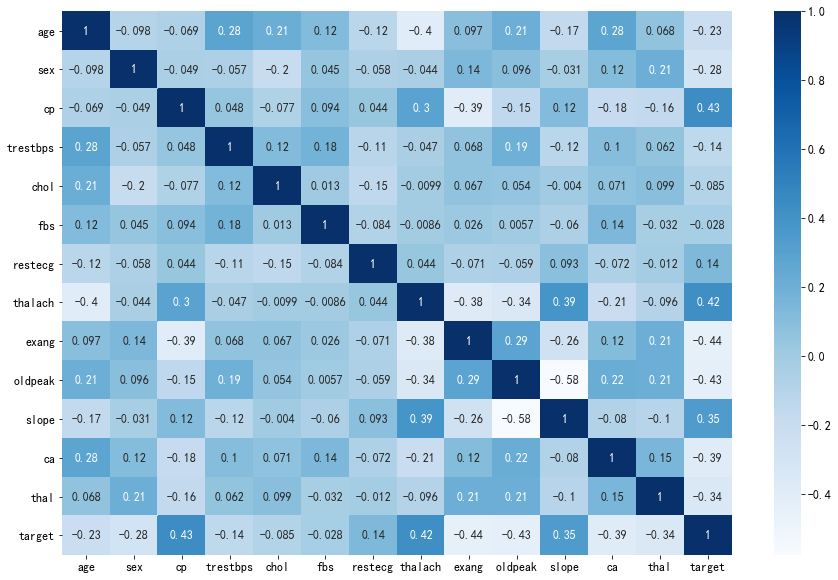

In [6]:
# 查看各个特征之间的关联性
# heart_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(heart_df.corr(), cmap="Blues", annot=True)

- 通过上图可以看到和是否患病target呈正相关的有cp,restecg,thalach,slope,其余全部呈负相关
- slope和oldpeak之间的负相关性较高，说明当运动相对于休息引起的ST抑制增大时，运动ST段的峰值斜率呈上坡趋势

#### 建模分析

In [7]:
# 数据预处理
features = heart_df.drop('target', axis=1)
targets = heart_df['target']

In [8]:
# 将离散型数据，从0，1，2这些，转换成字符串表示

# sex
features.loc[features['sex'] == 0, 'sex'] = "female"
features.loc[features['sex'] == 1, 'sex'] = "male"

# cp
features.loc[features['cp'] == 1, 'cp'] = "typical"
features.loc[features['cp'] == 2, 'cp'] = "atypical"
features.loc[features['cp'] == 3, 'cp'] = "non-anginal"
features.loc[features['cp'] == 4, 'cp'] = "asymptomatic"

# fbs
features.loc[features['fbs'] == 1, 'fbs'] = "true"
features.loc[features['fbs'] == 0, 'fbs'] = "false"

# exang
features.loc[features['exang'] == 0, 'exang'] = "false"
features.loc[features['exang'] == 1, 'exang'] = "true"

# slope
features.loc[features['slope'] == 1,'slope'] = 'true'
features.loc[features['slope'] == 2,'slope'] = 'true'
features.loc[features['slope'] == 3,'slope'] = 'true'

# thal
features.loc[features['thal'] == 3,'thal'] = 'normal'
features.loc[features['thal'] == 6,'thal'] = 'fixed'
features.loc[features['thal'] == 7,'thal'] = 'reversable'

# restecg
# 0：普通，1：ST-T波异常，2：可能左心室肥大
features.loc[features['restecg'] == 0,'restecg'] = 'normal'
features.loc[features['restecg'] == 1,'restecg'] = 'ST-T abnormal'
features.loc[features['restecg'] == 2,'restecg'] = 'Left ventricular hypertrophy'

# ca
features['ca'].astype("object")

# thal
features.thal.astype("object")

features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,non-anginal,145,233,true,normal,150,false,2.3,0,0,1
1,37,male,atypical,130,250,false,ST-T abnormal,187,false,3.5,0,0,2
2,41,female,typical,130,204,false,normal,172,false,1.4,true,0,2
3,56,male,typical,120,236,false,ST-T abnormal,178,false,0.8,true,0,2
4,57,female,0,120,354,false,ST-T abnormal,163,true,0.6,true,0,2


In [21]:
# 归一化（one-hot编码）标准化
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
features = pd.get_dummies(features)
features_temp = StandardScaler().fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_temp, targets, test_size=0.25)

#### 分类建模
- 1. K近邻
- 2. 决策树
- 3. 随机森林
- 4. 逻辑回归
- 5. SGD分类

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, roc_curve, average_precision_score, auc
# https://www.jianshu.com/p/c61ae11cc5f6

- **绘制精准率召回率曲线，ROC曲线----函数 plotting(estimator, X_test, y_test)**

In [11]:
# 绘制精准率召回率曲线，ROC曲线！！！
def plotting(estimator, X_test, y_test):
    
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    y_predict_proba = estimator.predict_proba(X_test) # 预测的概率
    # 绘制精准率召回率曲线
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_predict_proba[:, 1])# 精准率，召回率，阈值
    axes[0].plot(precisions, recalls)
    axes[0].set_title("平均精准率：%.2f" % average_precision_score(y_test, y_predict_proba[:, 1]))
    axes[0].set_xlabel("召回率")
    axes[0].set_ylabel("精准率")
    # ROC曲线
    fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba[:,1])# fpr，tpr，阈值
    axes[1].plot(fpr, tpr)
    axes[1].set_title("AUC值：%.2f" % auc(fpr, tpr))
    axes[1].set_xlabel("FPR")
    axes[1].set_ylabel("TPR")

    plt.tight_layout()

准确率： 0.8317486338797814
精准率： 0.7333333333333333
召回率： 0.8461538461538461
F1得分： 0.7857142857142856


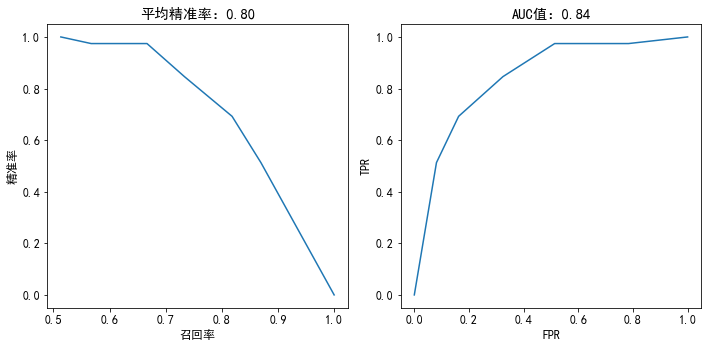

In [29]:
# 1. K近邻
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# 交叉验证
scores = cross_val_score(knn, features_temp, targets, cv=5)
print("准确率：", scores.mean())

knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
# 精确率
print("精准率：", precision_score(y_test, y_predict))
# 召回率
print("召回率：", recall_score(y_test, y_predict))
# F1-score
print("F1得分：", f1_score(y_test, y_predict))

# 使用自定义函数直接绘制评估曲线
plotting(knn, X_test, y_test)

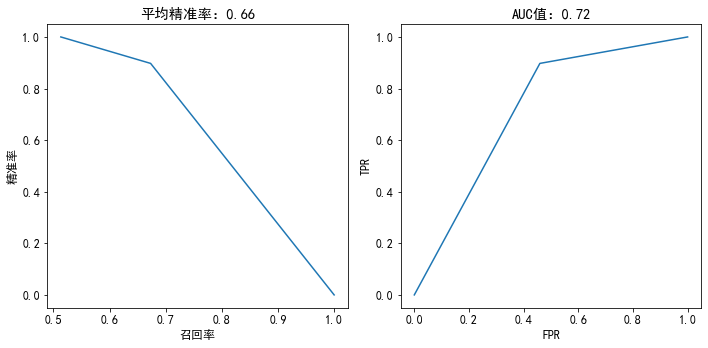

In [23]:
# 2. 决策树
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train, y_train)

plotting(tree, X_test, y_test)

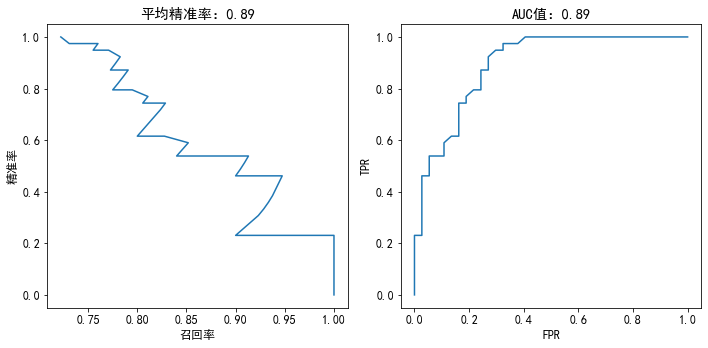

In [24]:
# 3. 随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

plotting(rf, X_test, y_test)

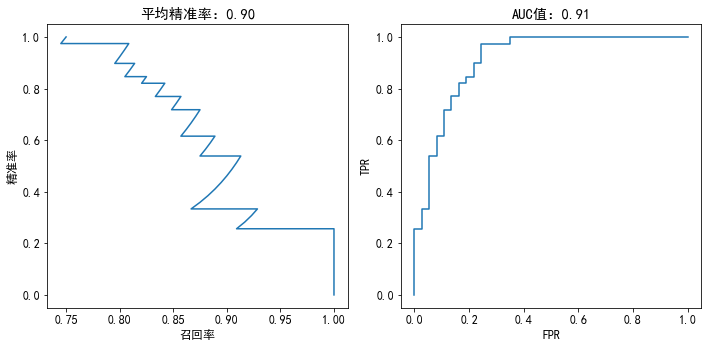

In [25]:
# 4. 逻辑回归
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression(tol=1e-10) 
logic.fit(X_train, y_train)

plotting(logic, X_test, y_test)

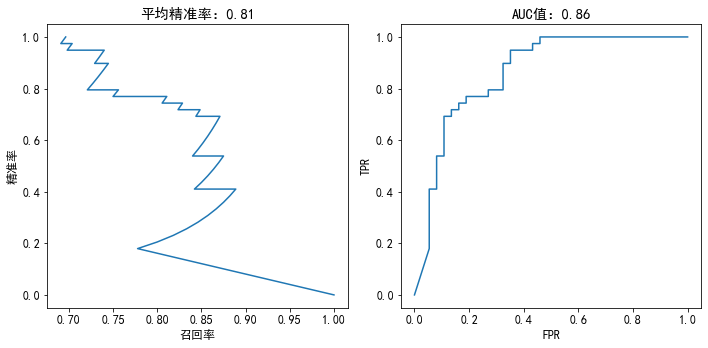

In [27]:
# 5. SGD分类
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log')# 注意此处要修改损失函数为 log
sgd.fit(X_train, y_train)

plotting(sgd, X_test, y_test)

- 通过以上的模型对比，可看出逻辑回归和随机森林是检测是否患病的较优模型，K近邻，SGD和决策树都不稳定（训练值不同，结果影响非常大）

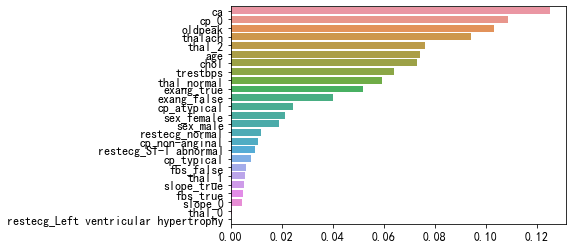

In [53]:
# 获取特征的重要性(使用随机森林，决策树不准确)
importances = pd.Series(data=rf.feature_importances_, index=features.columns).sort_values(ascending=False)
sns.barplot(y=importances.index, x=importances.values)

- 可以看到大部分特征都会对患病有所影响，只是影响程度都不算高，最高的影响也只有0.12